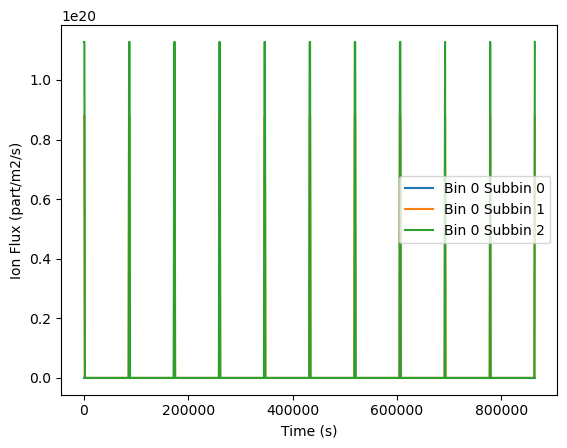

In [1]:
from main import plasma_data_handling, FW_bins

from iter_scenarios.benchmark import scenario as my_scenario

import numpy as np
import matplotlib.pyplot as plt

first_pulse = my_scenario.pulses[0]
t = np.linspace(0, first_pulse.total_duration * first_pulse.nb_pulses, 1000)
FW_bin = FW_bins.bins[0]
for i, sub_bin in enumerate(FW_bin.sub_bins):
    ion_flux = []
    for t_val in t:
        ion_flux.append(
            plasma_data_handling.get_particle_flux(first_pulse, bin=sub_bin, t_rel=t_val, ion=True)
        )
    plt.plot(t, ion_flux, label=f"Bin {FW_bin.index} Subbin {i}")
plt.xlabel("Time (s)")
plt.ylabel("Ion Flux (part/m2/s)")
plt.legend()
plt.show()


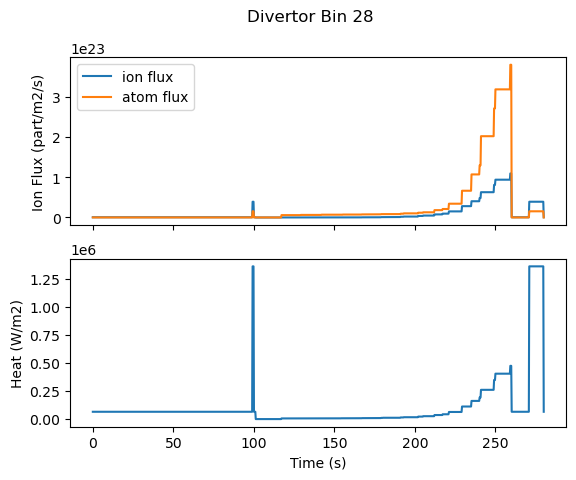

In [2]:
from main import plasma_data_handling, Div_bins

from hisp.scenario import Pulse

import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 400, 1000)
div_bin = Div_bins.bins[10]

assert div_bin.outer_bin

RISP_pulse = Pulse(
    pulse_type="RISP",
    nb_pulses=1,
    ramp_up=10,
    ramp_down=10,
    steady_state=260,
    waiting=0,
    tritium_fraction=0,
)
t = np.linspace(0, RISP_pulse.total_duration, 1000)

ion_flux = []
atom_flux = []
heat_flux = []
for t_val in t:
    ion_flux.append(
        plasma_data_handling.get_particle_flux(RISP_pulse, bin=div_bin, t_rel=t_val, ion=True)
    )
    atom_flux.append(
        plasma_data_handling.get_particle_flux(RISP_pulse, bin=div_bin, t_rel=t_val, ion=False)
    )
    heat_flux.append(
        plasma_data_handling.get_heat(RISP_pulse, bin=div_bin, t_rel=t_val)
    )

fig, axs = plt.subplots(2, sharex=True)
plt.suptitle(f"Divertor Bin {div_bin.index}")
plt.sca(axs[0])
plt.plot(t, ion_flux, label="ion flux")
plt.plot(t, atom_flux, label=f"atom flux")
plt.legend()
plt.ylabel("Ion Flux (part/m2/s)")
plt.sca(axs[1])
plt.plot(t, heat_flux, label=f"Heat flux")
plt.ylabel("Heat (W/m2)")
plt.xlabel("Time (s)")
plt.show()


In [3]:
from main import plasma_data_handling, Div_bins

import numpy as np
import matplotlib.pyplot as plt


div_bin = Div_bins.bins[0]

ion_flux = []
atom_flux = []
heat_flux = []
t = []
t_current = 0
for pulse in my_scenario.pulses:
    t_start = my_scenario.get_time_start_current_pulse(t_current)

    t_end = t_start + pulse.total_duration * pulse.nb_pulses

    for t_val in np.linspace(t_start, t_end, 1000):
        t.append(t_val)
        ion_flux.append(
            plasma_data_handling.get_particle_flux(pulse, bin=div_bin, t_rel=t_val, ion=True)
        )
        atom_flux.append(
            plasma_data_handling.get_particle_flux(pulse, bin=div_bin, t_rel=t_val, ion=False)
        )
        heat_flux.append(
            plasma_data_handling.get_heat(pulse, bin=div_bin, t_rel=t_val)
        )
    t_current = t_end
fig, axs = plt.subplots(2, sharex=True)
plt.suptitle(f"Divertor Bin {div_bin.index}")
plt.sca(axs[0])
print(t)
print(ion_flux)
plt.plot(t, ion_flux, label="ion flux")
plt.plot(t, atom_flux, label=f"atom flux")
plt.legend()
plt.ylabel("Ion Flux (part/m2/s)")
plt.sca(axs[1])
plt.plot(t, heat_flux, label=f"Heat flux")
plt.ylabel("Heat (W/m2)")
plt.xlabel("Time (s)")
plt.show()


ValueError: Invalid pulse type BAKE

[np.float64(0.0), np.float64(864.8648648648649), np.float64(1729.7297297297298), np.float64(2594.5945945945946), np.float64(3459.4594594594596), np.float64(4324.324324324324), np.float64(5189.189189189189), np.float64(6054.054054054054), np.float64(6918.918918918919), np.float64(7783.783783783784), np.float64(8648.648648648648), np.float64(9513.513513513513), np.float64(10378.378378378378), np.float64(11243.243243243243), np.float64(12108.108108108108), np.float64(12972.972972972973), np.float64(13837.837837837838), np.float64(14702.702702702703), np.float64(15567.567567567568), np.float64(16432.432432432433), np.float64(17297.297297297297), np.float64(18162.162162162163), np.float64(19027.027027027027), np.float64(19891.891891891893), np.float64(20756.756756756757), np.float64(21621.621621621623), np.float64(22486.486486486487), np.float64(23351.351351351354), np.float64(24216.216216216217), np.float64(25081.081081081084), np.float64(25945.945945945947), np.float64(26810.810810810814)

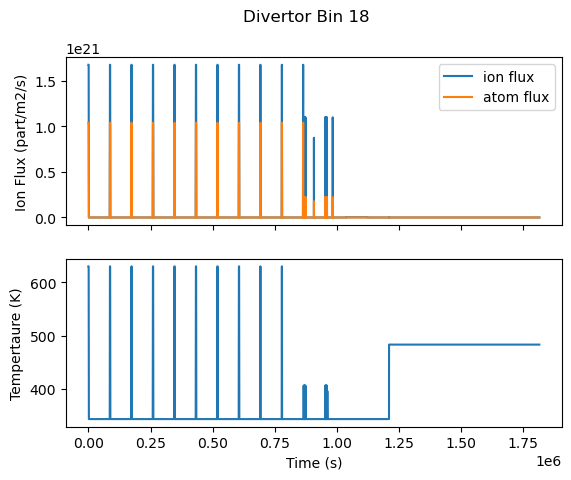

In [30]:
from hisp.festim_models import make_temperature_function
from main import plasma_data_handling, Div_bins
from iter_scenarios.benchmark import scenario as my_scenario

import numpy as np
import matplotlib.pyplot as plt


div_bin = Div_bins.bins[0]

ion_flux = []
atom_flux = []
temperature = []
t = []
t_current = 0
x_surface = np.array([0.0])
for pulse in my_scenario.pulses:
    t_start = my_scenario.get_time_start_current_pulse(t_current)

    t_end = t_start + pulse.total_duration * pulse.nb_pulses

    for t_val in np.linspace(t_start, t_end, 1000):
        t.append(t_val)
        ion_flux.append(
            plasma_data_handling.get_particle_flux(pulse, bin=div_bin, t_rel=t_val, ion=True)
        )
        atom_flux.append(
            plasma_data_handling.get_particle_flux(pulse, bin=div_bin, t_rel=t_val, ion=False)
        )
        T_func = make_temperature_function(
            scenario=my_scenario,
            plasma_data_handling=plasma_data_handling,
            bin=div_bin,
            coolant_temp=343
        )
        temp_value = T_func(x_surface, t_val)  
        temperature.append(temp_value)  
    t_current = t_end
fig, axs = plt.subplots(2, sharex=True)
plt.suptitle(f"Divertor Bin {div_bin.index}")
plt.sca(axs[0])
print(t)
print(ion_flux)
plt.plot(t, ion_flux, label="ion flux")
plt.plot(t, atom_flux, label=f"atom flux")
plt.legend()
plt.ylabel("Ion Flux (part/m2/s)")
plt.sca(axs[1])
plt.plot(t, temperature, label=f"temperature")
plt.ylabel("Tempertaure (K)")
plt.xlabel("Time (s)")
plt.show()

[array(343.), array(343.56117137), array(344.12234273), array(344.6835141), array(345.24468547), array(345.80585684), array(346.3670282), array(346.92819957), array(347.48937094), array(348.05054231), array(348.61171367), array(349.17288504), array(349.73405641), array(350.29522778), array(350.85639914), array(351.41757051), array(351.97874188), array(352.53991325), array(353.10108461), array(353.66225598), array(354.22342735), array(354.78459872), array(355.34577008), array(355.90694145), array(356.46811282), array(357.02928419), array(357.59045555), array(358.15162692), array(358.71279829), array(359.27396966), array(359.83514102), array(360.39631239), array(360.95748376), array(361.51865513), array(362.07982649), array(362.64099786), array(363.20216923), array(363.7633406), array(364.32451196), array(364.88568333), array(365.4468547), array(366.00802607), array(366.56919743), array(367.1303688), array(367.69154017), array(368.25271154), array(368.8138829), array(369.37505427), array

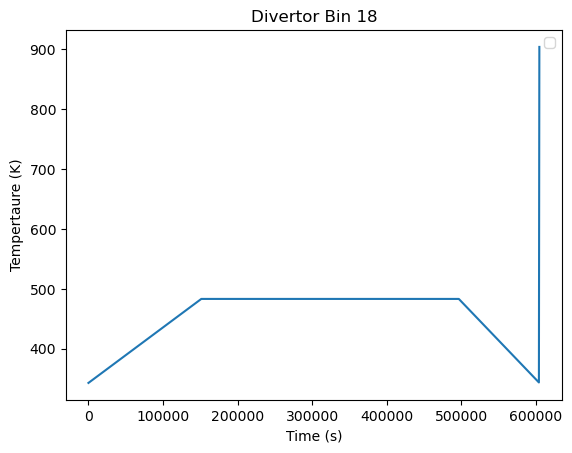

In [1]:
from hisp.festim_models import make_temperature_function
from main import plasma_data_handling, Div_bins, Scenario
from hisp.scenario import Pulse

import numpy as np
import matplotlib.pyplot as plt

bake = Pulse(
    pulse_type="BAKE",
    nb_pulses=1,
    ramp_up=151200, # 5C degrees per hour; 42 hours total
    steady_state=345600,
    ramp_down=108000, # -7C per hour; 30 hours total
    waiting=11,  # HISP expects at least 10 s of waiting...
    tritium_fraction=0.0,
)

test_scenario = Scenario(pulses=[bake])

div_bin = Div_bins.bins[0]

temperature = []
t = []
t_current = 0
x_surface = np.array([0.0])
for pulse in test_scenario.pulses:
    t_start = test_scenario.get_time_start_current_pulse(t_current)

    t_end = t_start + pulse.total_duration * pulse.nb_pulses

    for t_val in np.linspace(t_start, t_end, 1000):
        t.append(t_val)
        T_func = make_temperature_function(
            scenario=test_scenario,
            plasma_data_handling=plasma_data_handling,
            bin=div_bin,
            coolant_temp=343
        )
        temp_value = T_func(x_surface, t_val)  
        temperature.append(temp_value)  
    t_current = t_end
    print(temperature)
plt.figure()
plt.title(f"Divertor Bin {div_bin.index}")
plt.legend()
plt.plot(t, temperature, label=f"temperature")
plt.ylabel("Tempertaure (K)")
plt.xlabel("Time (s)")
plt.show()

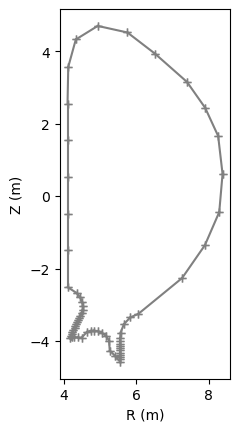

In [5]:
from make_iter_bins import my_reactor

bins = my_reactor.first_wall.bins + my_reactor.divertor.bins

norm = plt.Normalize(0, len(bins))
cmap = plt.get_cmap("viridis")

for bin in bins:
    plt.plot(
        [bin.start_point[0], bin.end_point[0]],
        [bin.start_point[1], bin.end_point[1]],
        # c=cmap(norm(bin.index)),
        c="grey",
        marker="+",
    )
# plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), label="Bin Index", ax=plt.gca())
plt.xlabel("R (m)")
plt.ylabel("Z (m)")
plt.gca().set_aspect("equal", adjustable="box")
plt.savefig("iter_bins.svg")

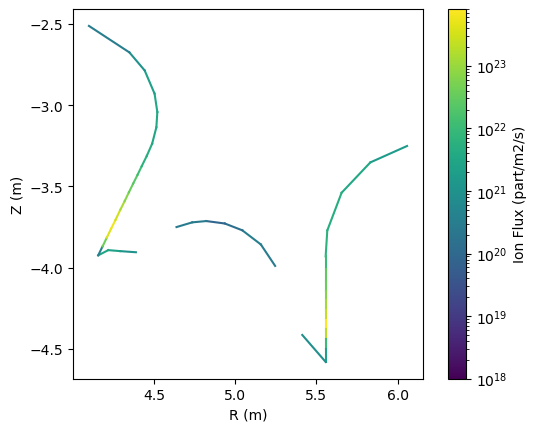

In [6]:
from make_iter_bins import my_reactor

bins = my_reactor.first_wall.bins + my_reactor.divertor.bins
ion_fluxes = []
start_points = []
end_points = []

for bin in my_reactor.divertor.bins:
    ion_fluxes.append(
        float(plasma_data_handling.get_particle_flux(first_pulse, bin=bin, t_rel=0, ion=True))
    )
    start_points.append(bin.start_point)
    end_points.append(bin.end_point)

from matplotlib.colors import LogNorm, Normalize
norm = LogNorm(1e18, max(ion_fluxes))
cmap = plt.get_cmap("viridis")


for start_point, end_point, ion_flux in zip(start_points, end_points, ion_fluxes):
    plt.plot(
        [start_point[0], end_point[0]],
        [start_point[1], end_point[1]],
        c=cmap(norm(ion_flux)),
    )
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), label="Ion Flux (part/m2/s)", ax=plt.gca())
plt.xlabel("R (m)")
plt.ylabel("Z (m)")
plt.gca().set_aspect("equal", adjustable="box")

plt.savefig("iter_div_ion_flux.svg")

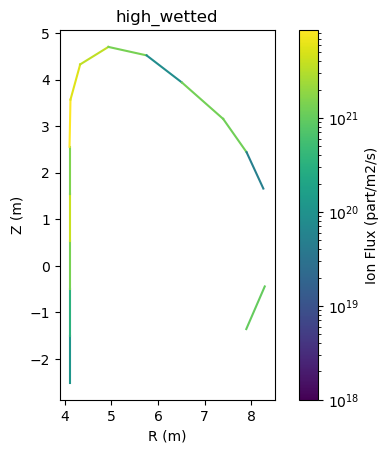

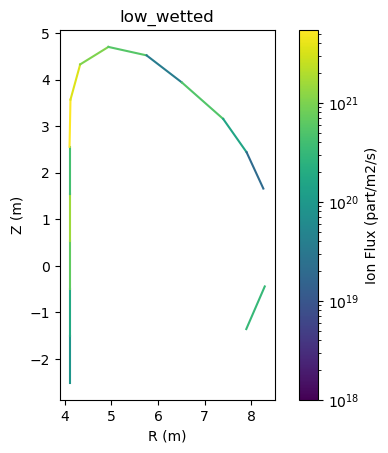

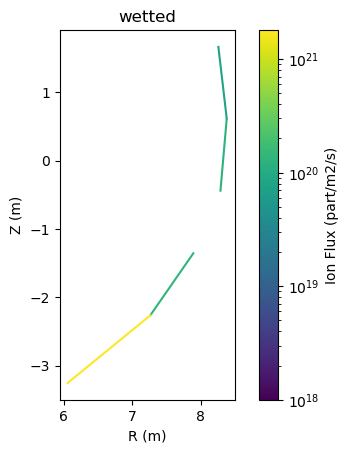

In [7]:
from make_iter_bins import my_reactor
from matplotlib.colors import LogNorm

for mode in ["high_wetted", "low_wetted", "wetted"]:
    ion_fluxes = []
    start_points = []
    end_points = []
    for bin in my_reactor.first_wall.bins:
        for sub_bin in bin.sub_bins:
            if sub_bin.mode == mode:
                ion_flux = plasma_data_handling.get_particle_flux(first_pulse, bin=sub_bin, t_rel=0, ion=True)
                ion_fluxes.append(ion_flux)

                start_points.append(bin.start_point)
                end_points.append(bin.end_point)


    norm = LogNorm(1e18, max(ion_fluxes))
    cmap = plt.get_cmap("viridis")


    for start_point, end_point, ion_flux in zip(start_points, end_points, ion_fluxes):
        plt.plot(
            [start_point[0], end_point[0]],
            [start_point[1], end_point[1]],
            c=cmap(norm(ion_flux)),
        )
    plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), label="Ion Flux (part/m2/s)", ax=plt.gca())
    plt.xlabel("R (m)")
    plt.ylabel("Z (m)")
    plt.gca().set_aspect("equal", adjustable="box")
    plt.title(mode)
    plt.show()

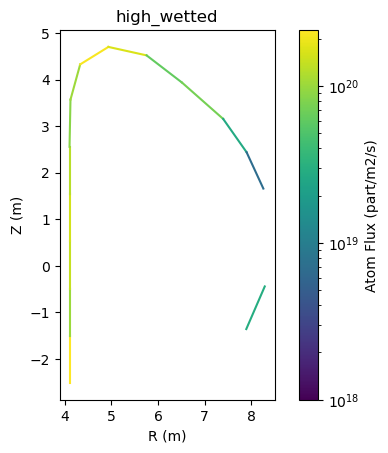

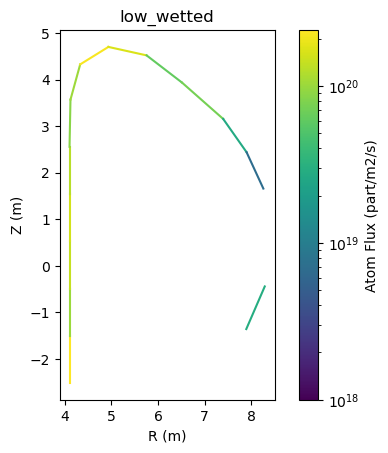

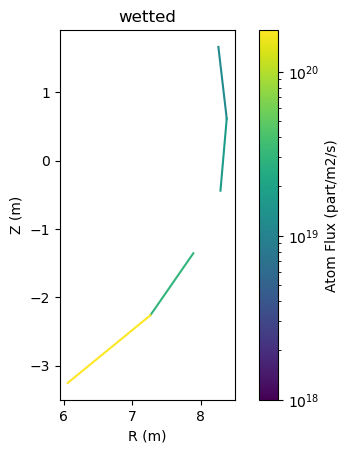

In [8]:
from make_iter_bins import my_reactor
from matplotlib.colors import LogNorm

for mode in ["high_wetted", "low_wetted", "wetted"]:
    atom_fluxes = []
    start_points = []
    end_points = []
    for bin in my_reactor.first_wall.bins:
        for sub_bin in bin.sub_bins:
            if sub_bin.mode == mode:
                atom_flux = plasma_data_handling.get_particle_flux(first_pulse, bin=sub_bin, t_rel=0, ion=False)
                atom_fluxes.append(atom_flux)

                start_points.append(bin.start_point)
                end_points.append(bin.end_point)


    norm = LogNorm(1e18, max(atom_fluxes))
    cmap = plt.get_cmap("viridis")


    for start_point, end_point, ion_flux in zip(start_points, end_points, atom_fluxes):
        plt.plot(
            [start_point[0], end_point[0]],
            [start_point[1], end_point[1]],
            c=cmap(norm(ion_flux)),
        )
    plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), label="Atom Flux (part/m2/s)", ax=plt.gca())
    plt.xlabel("R (m)")
    plt.ylabel("Z (m)")
    plt.gca().set_aspect("equal", adjustable="box")
    plt.title(mode)
    plt.show()

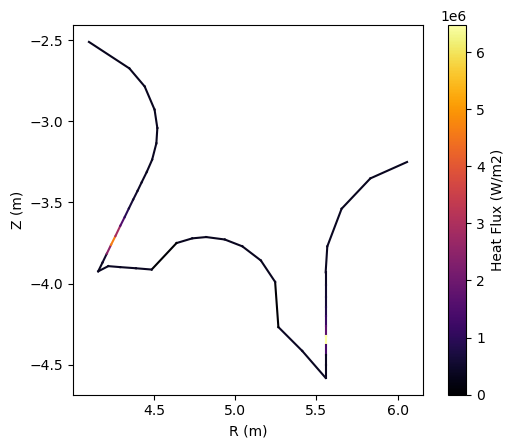

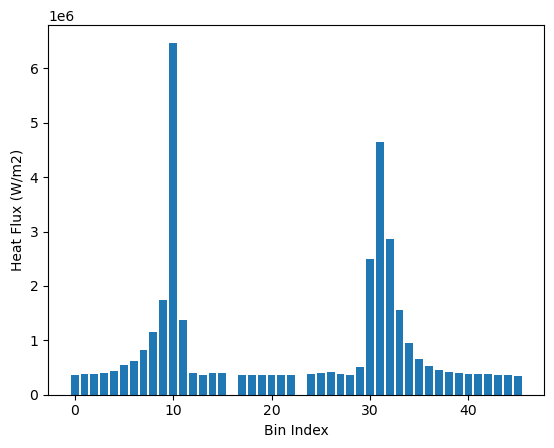

In [9]:
from make_iter_bins import my_reactor

heat_fluxes = []
start_points = []
end_points = []
for bin in my_reactor.divertor.bins:
    heat_flux = plasma_data_handling.get_heat(first_pulse, bin=bin, t_rel=0)
    heat_fluxes.append(heat_flux)

    start_points.append(bin.start_point)
    end_points.append(bin.end_point)


norm = Normalize(0, max(heat_fluxes))
cmap = plt.get_cmap("inferno")


for start_point, end_point, heat_flux in zip(start_points, end_points, heat_fluxes):
    plt.plot(
        [start_point[0], end_point[0]],
        [start_point[1], end_point[1]],
        c=cmap(norm(heat_flux)),
    )
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), label="Heat Flux (W/m2)", ax=plt.gca())
plt.xlabel("R (m)")
plt.ylabel("Z (m)")
plt.gca().set_aspect("equal", adjustable="box")
plt.show()

plt.bar(range(len(heat_fluxes)), heat_fluxes)
plt.xlabel("Bin Index")
plt.ylabel("Heat Flux (W/m2)")
plt.show()

In [ ]:
cmap = plt.get_cmap("inferno")



def plot_frame(t: float):
    heat_fluxes = []
    start_points = []
    end_points = []
    for bin in my_reactor.divertor.bins:
        if not (bin.inner_bin or bin.outer_bin):
            heat_flux = float("nan")
        else:
            heat_flux = plasma_data_handling.get_heat(RISP_pulse, bin=bin, t_rel=t)
        heat_fluxes.append(heat_flux)

        start_points.append(bin.start_point)
        end_points.append(bin.end_point)

    plt.figure()
    max_heat_flux = 1.3e6  # W/m2
    norm = Normalize(0, max_heat_flux)

    for start_point, end_point, heat_flux in zip(start_points, end_points, heat_fluxes):
        plt.plot(
            [start_point[0], end_point[0]],
            [start_point[1], end_point[1]],
            c=cmap(norm(heat_flux)),
        )

    plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), label="Heat Flux (W/m2)", ax=plt.gca())
    plt.xlabel("R (m)")
    plt.ylabel("Z (m)")
    plt.gca().set_aspect("equal", adjustable="box")
    plt.title(f"t = {t:.0f} s")
    plt.savefig(f"figs/divertor_heat_flux/{t:.0f}.png")
    plt.clf()

    plt.figure()
    plt.plot(my_reactor.divertor.arc_length(middle=True), heat_fluxes)
    plt.ylim(0, max_heat_flux)
    plt.xlabel("Arc Length (m)")
    plt.ylabel("Heat Flux (W/m2)")
    plt.title(f"t = {t:.0f} s")
    plt.savefig(f"figs/divertor_heat_flux_al/{t:.0f}.png")
    plt.clf()


for t in np.linspace(0, RISP_pulse.duration_no_waiting, int(RISP_pulse.duration_no_waiting)):
    plot_frame(t)